This notebook shows the plots which compare 2005 UD with other asteroids, meteorites, and lunar samples.

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np

from io import StringIO
import numpy as np
import pandas as pd
# from scipy.optimize import curve_fit
import ysvisutilpy as yvu


uddata = StringIO('''h h_err a0 a0_err Pmin Pmin_err
0.201 0.007 19.69 0.30 -1.10 0.059
0.177 0.007 18.08 0.56 -1.35 0.21
''')
# the bound (c1/c2 positive) and unbound (allowed negative) results.

uddata = pd.read_csv(uddata, sep=' ')
bennu = pd.DataFrame(data=[[0.276, 0.012, 17.88, 0.40, -1.43, 0.14]], 
                     columns=['h', 'h_err', 'a0', 'a0_err', 'Pmin', 'Pmin_err'])

FIGDIR = Path("figs")
DATADIR = Path("../data")
DATADIR2 = Path("../../__secured_data")  # Data by courtesy of I. Belskaya (to M. Ishiguro)

In [3]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

In [4]:
_df1 = pd.read_csv(DATADIR2/"Belskaya_dataPminAlpha_BCFG.DAT", sep='\t',
                   names=["num", "name", "a0", "a0_err", "Pmin", "Pmin_err", "type"])
_df2 = pd.read_csv(DATADIR2/"Belskaya_dataPminAlpha_others.DAT", sep='\t',
                   names=["num", "name", "a0", "a0_err", "Pmin", "Pmin_err", "type"])
df_Bel = pd.concat([_df1, _df2])
df_Bel["Pmin"] *= -1

df_gd86 = pd.read_csv(DATADIR/"GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
df_l = df_gd86.loc[(df_gd86['category'].str.startswith("Lunar"))]
df_m1 = df_gd86.loc[(
    (df_gd86['category'] == 'Meteoritic Powder')
   &(df_gd86['type_original'].str.startswith('C'))
)]

df_m2 = pd.read_csv(DATADIR/"1977LPSC....8.1091Z.csv")
df_m2 = df_m2.loc[(
    (df_m2["description"].str.contains("Chondrite", na=False))
   &(df_m2["Filter"].isin(["O (0.585)", "G"]))
)]

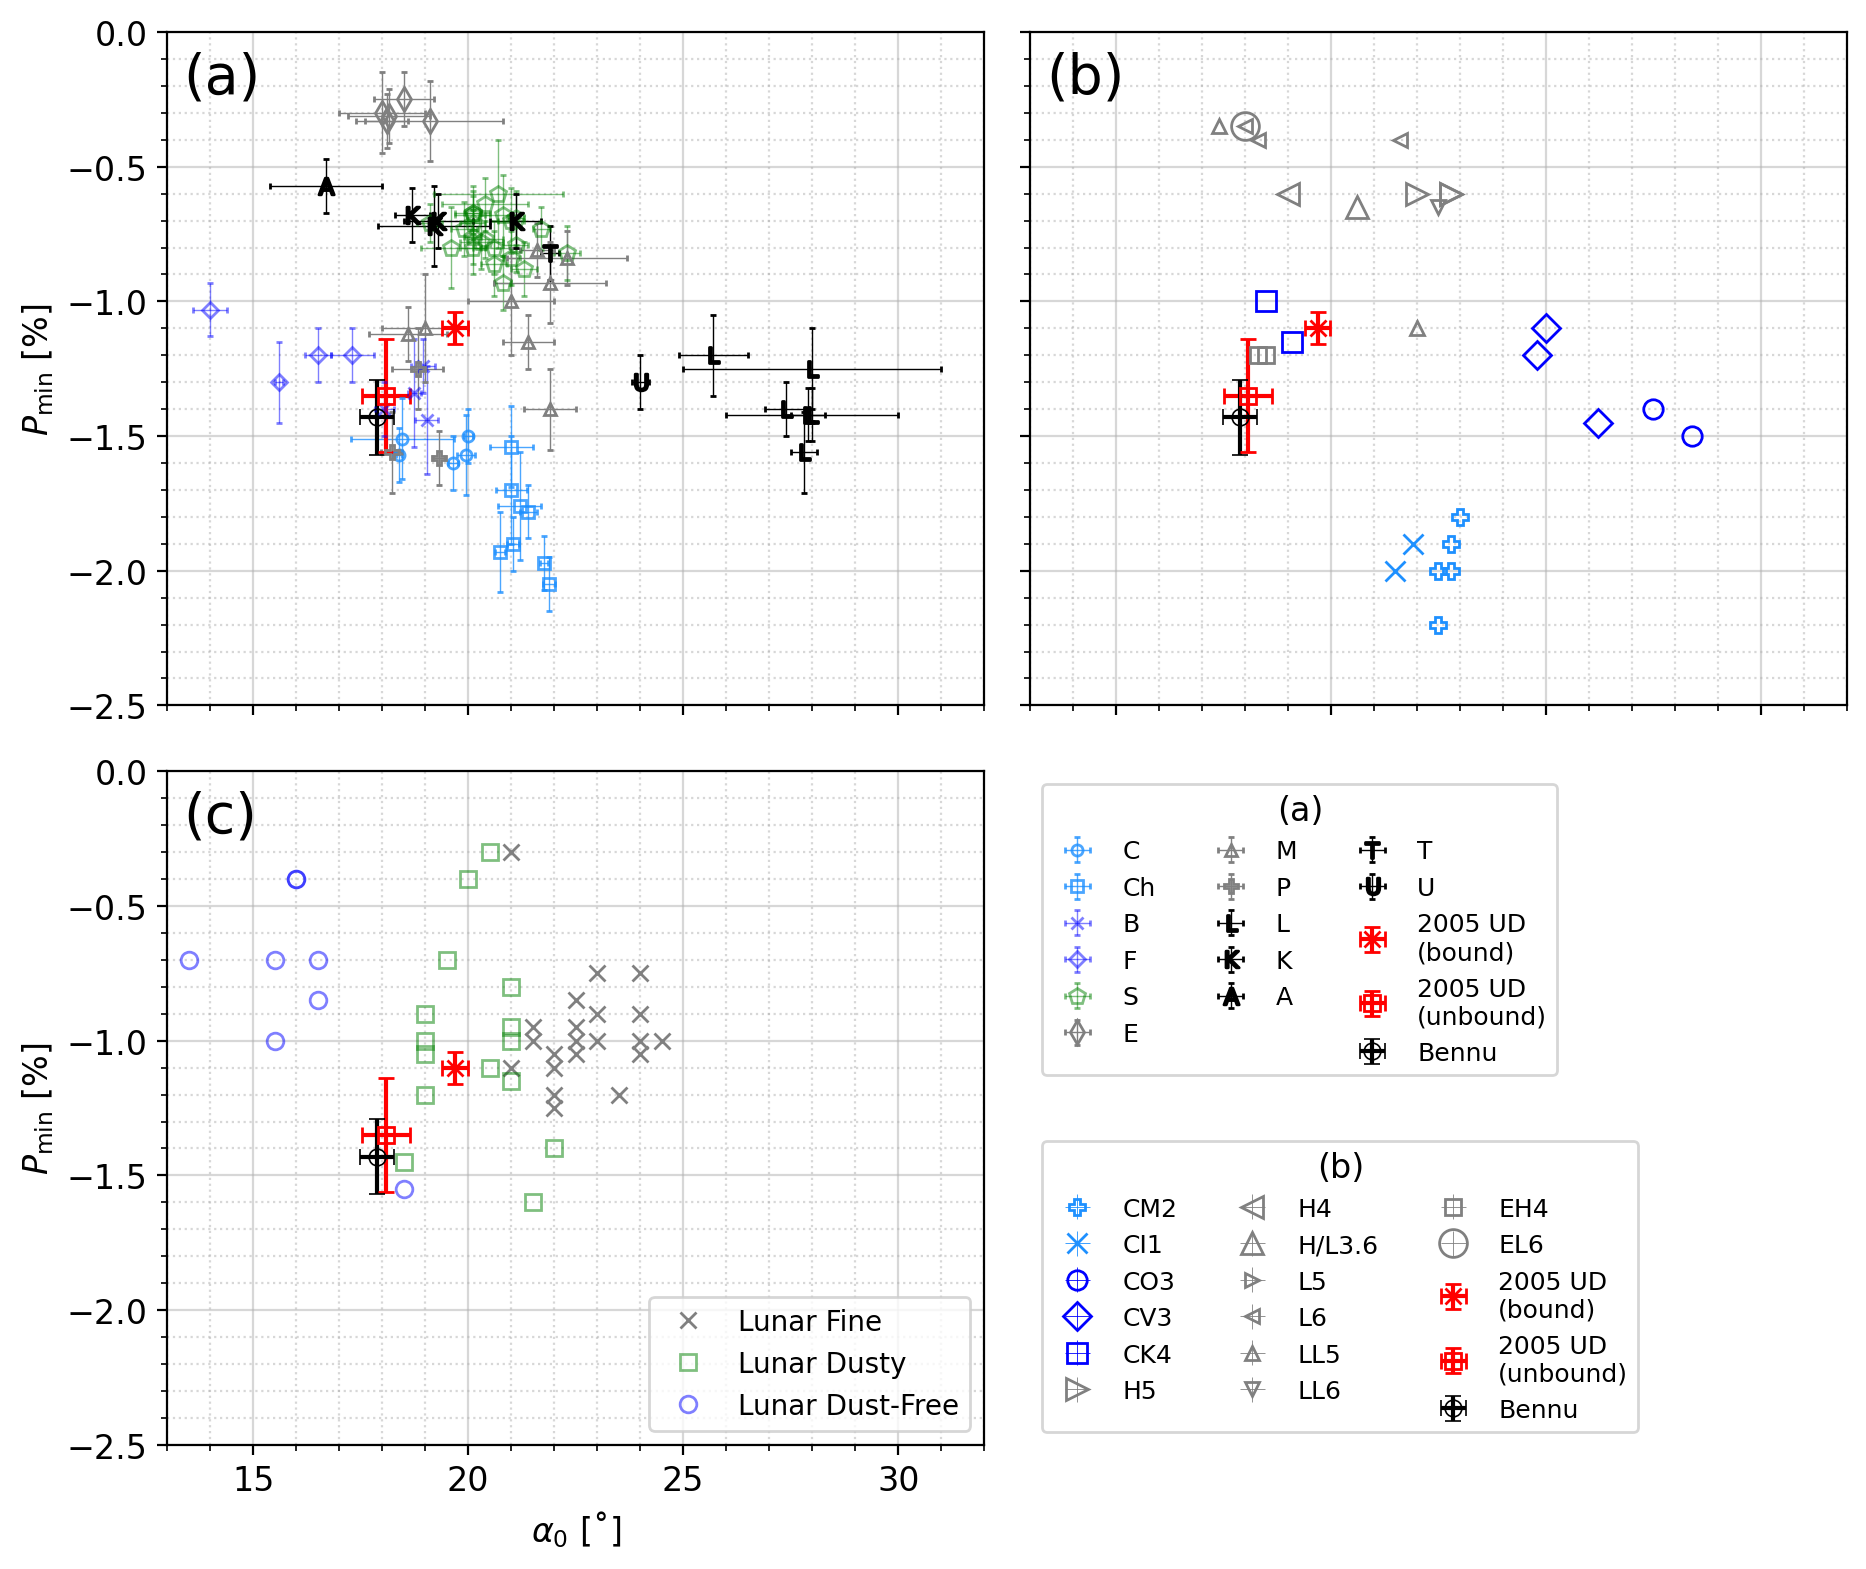

In [10]:
kws_a = {
    "C":  dict(marker='o', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
    "Ch": dict(marker='s', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
    "B":  dict(marker='x', mfc='none', ms=4, color='b', alpha=0.5),
    "F":  dict(marker='D', mfc='none', ms=4, color='b', alpha=0.5),
    "S":  dict(marker='p', mfc='none', ms=6, color='g', alpha=0.5),
#     "E":  dict(marker='d', mfc='none', ms=4, color='chocolate', alpha=0.8),
#     "M":  dict(marker='^', mfc='none', ms=4, color='darkorange', alpha=1),
#     "P":  dict(marker='4', mfc='none', ms=8, color='tomato'),
#     "L":  dict(marker='1', mfc='none', ms=8, color='g'),
    "E":  dict(marker='d', mfc='none', ms=6, color='gray'),
    "M":  dict(marker='^', mfc='none', ms=4, color='gray'),
    "P":  dict(marker='P', mfc='none', ms=5, color='gray'),
    "L":  dict(marker='$\mathrm{L}$', mfc='none', ms=6, color='k'),
    "K":  dict(marker='$\mathrm{K}$', mfc='none', ms=6, color='k'),
    "A":  dict(marker='$\mathrm{A}$', mfc='none', ms=6, color='k'),
    "T":  dict(marker='$\mathrm{T}$', mfc='none', ms=6, color='k'),
    "U":  dict(marker='$\mathrm{U}$', mfc='none', ms=6, color='k'),
}

kws_m = {
# CC
    "CM2": dict(marker='P', mfc='none', ms=6, color='dodgerblue'),
    "CI1": dict(marker='x', mfc='none', ms=7, color='dodgerblue'),
    "CO3": dict(marker='o', mfc='none', ms=7, color='b'),
    "CV3": dict(marker='D', mfc='none', ms=7, color='b'),
    "CK4": dict(marker='s', mfc='none', ms=7, color='b'),
# etc (OC)
    "H5":  dict(marker='>', mfc='none', ms=8, color='gray'),
    "H4":  dict(marker='<' , mfc='none', ms=8, color='gray'),
    "H/L3.6": dict(marker='^', mfc='none', ms=8, color='gray'),
    "L5":  dict(marker='>' , mfc='none', ms=5, color='gray'),
    "L6":  dict(marker='<', mfc='none', ms=5, color='gray'),
    "LL5": dict(marker='^', mfc='none', ms=5, color='gray'),
    "LL6": dict(marker='v', mfc='none', ms=5, color='gray'),
    "EH4": dict(marker='s', mfc='none', ms=6, color='gray'),
    "EL6": dict(marker='o', mfc='none', ms=10, color='gray'),
}

kws_l = {
    'Lunar Fine':      dict(marker='x', mfc='none', ms=6, color='gray'),
    'Lunar Dusty':     dict(marker='s', mfc='none', ms=6, color='g', alpha=0.5),
    'Lunar Dust-Free': dict(marker='o', mfc='none', ms=6, color='b', alpha=0.5)
}

udkw1 = dict(marker='x', color='r', mfc='none', ms=6, mew=1., ls='', capsize=3, alpha=1)
udkw2 = dict(marker='s', color='r', mfc='none', ms=6, mew=1., ls='', capsize=3, alpha=1)
bnkw = dict(marker='o', color='k', mfc='none', ms=6, mew=0.6, ls='', capsize=3, alpha=1)
errbfmt = dict(ls='', capsize=1, elinewidth=0.5)
nanpos = dict(x=np.nan, y=np.nan, xerr=np.nan, yerr=np.nan)

fig, axs = plt.subplots(2, 2, figsize=(9.5, 8), 
                        sharex=True, sharey=True, gridspec_kw=None)
axa = axs[0, 0]  # asteroids
axm = axs[0, 1]  # meteorites
axl = axs[1, 0]  # lunar

_ax1 = axs[1, 1]
_ax2 = axs[1, 1].twinx()  # Fake axes


xval, yval = "a0", "Pmin"
for t, kw in kws_a.items():
    df = df_Bel.loc[df_Bel["type"] == t]
    axa.errorbar(
        df[xval], df[yval], **errbfmt, **kw,
        xerr=df[f"{xval}_err"], yerr=df[f"{yval}_err"]
    )    
    _ax1.errorbar(**nanpos, **errbfmt, **kw, label=t)

for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    _ax2.errorbar(**nanpos, **kw, ls='', elinewidth=0.3, label=t)
    # For triangular markers, center is difficult to know, 
    # so I put ``+'' like grid to legend by using errorbar

for t, kw in kws_l.items():
    df = df_l.loc[df_l["category"] == t]
    axl.plot(df[xval], df[yval], ls='', **kw, label=t)
axl.legend(loc=4, fontsize=10)
    
abc = ['(a)', '(b)', '(c)']
for i, ax in enumerate([axa, axm, axl]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
    ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
                xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
for aa in [_ax1, _ax2]:
    aa.axis('off')
    aa.errorbar(**nanpos, **udkw1, label="2005 UD\n(bound)")
    aa.errorbar(**nanpos, **udkw2, label="2005 UD\n(unbound)")
    aa.errorbar(**nanpos, **bnkw, label="Bennu")
    
    
axa.set(ylabel=r"$P_\mathrm{min}$ [%]", ylim=(-2.5, 0), xlim=(13, 32))
axl.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$\alpha_0$ [˚]")
_ax1.legend(loc=2, ncol=3, fontsize=9, title="(a)")
_ax2.legend(loc=3, ncol=3, fontsize=9, title="(b)")

yvu.linticker([axa, axm, axl], xmajlockws=5, xminlockws=1, ymajlockws=0.5, yminlockws=0.1)
plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"a0-Pmin.pdf")
plt.show()

Using $\lg p_V = C_1 \lg h + C_2$ with Lupishko 2018 ($C_1 = -0.989$, $C_2 = -1.719$ without error-bars)

In [6]:
C1, C2 = -0.989, -1.719
pV_phae = np.array([0.08, 0.12])  # rough min/max
h_phae = 10**((np.log10(pV_phae) - C2) / C1)
h_phae

array([0.23495837, 0.1559341 ])

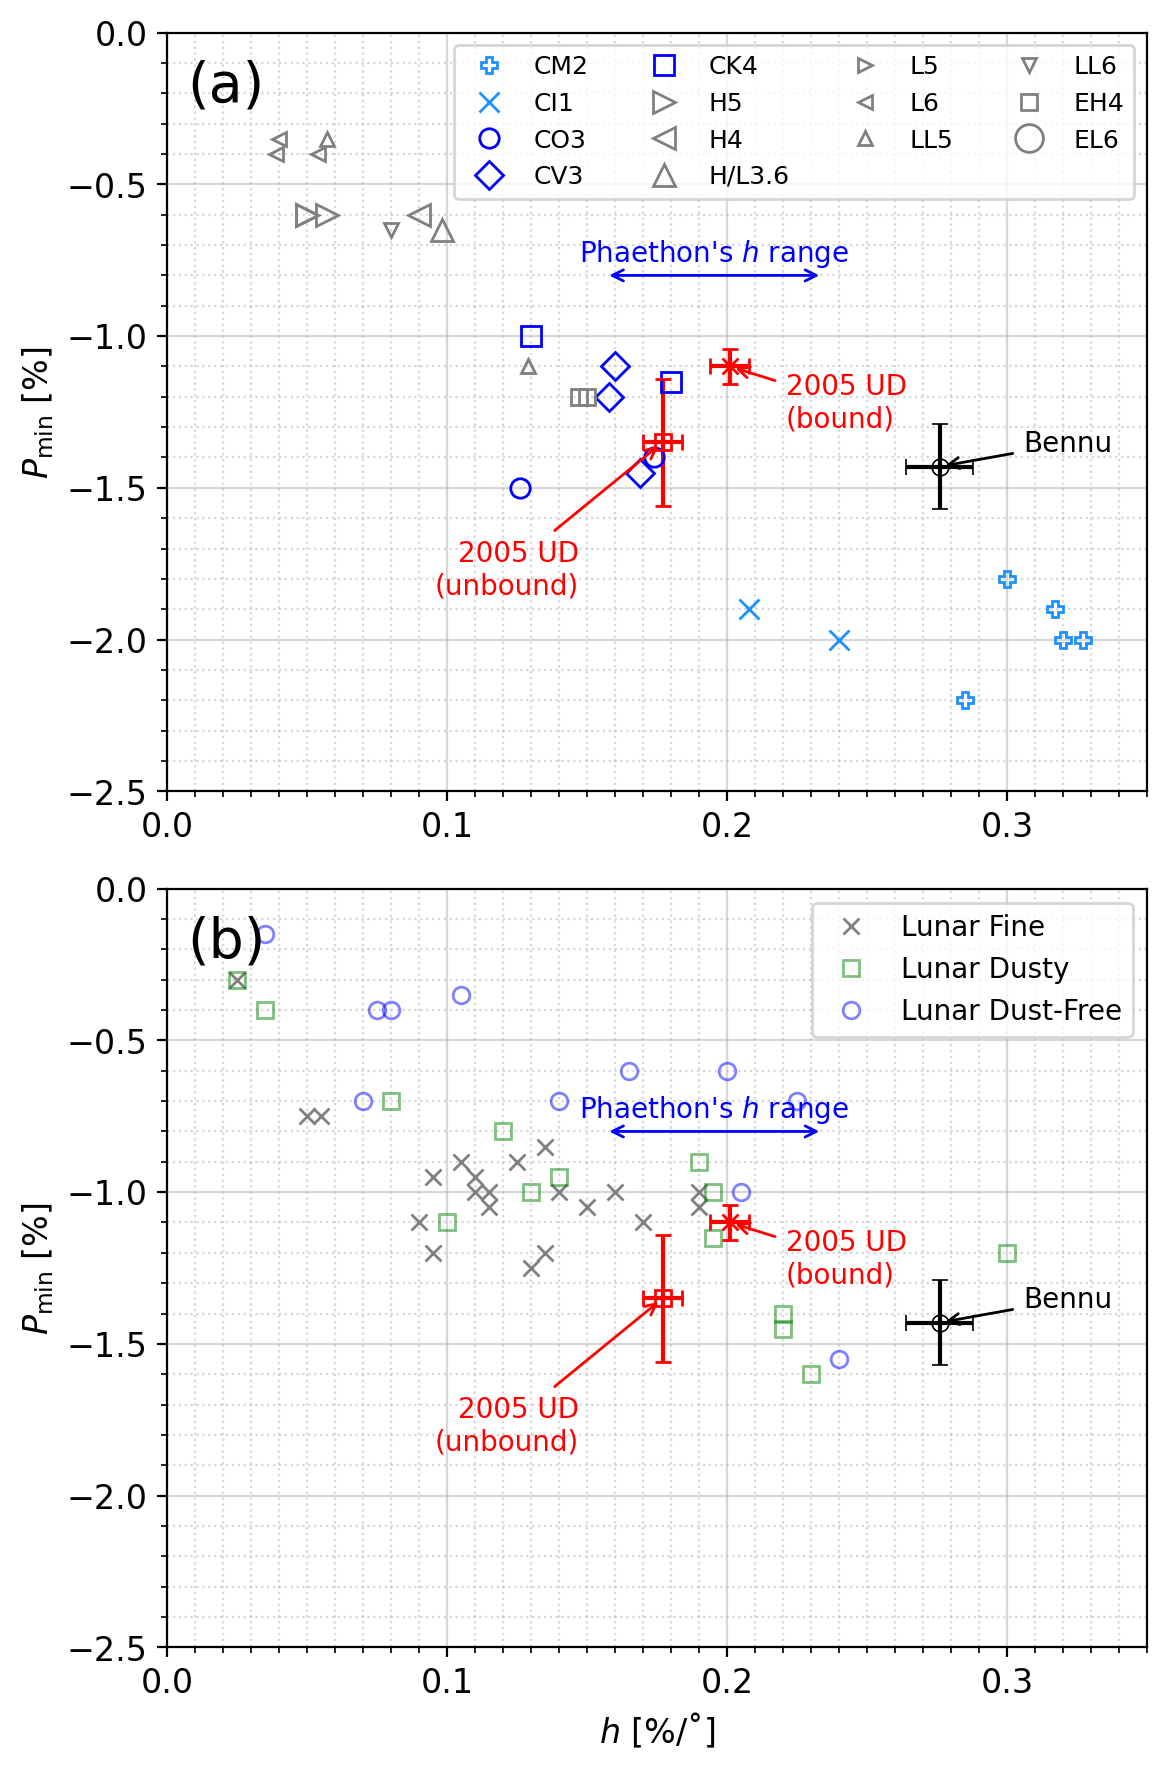

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(6., 9), 
                        sharex=False, sharey=True, gridspec_kw=None)

axm = axs[0]  # meteorites
axl = axs[1]  # lunar

xval, yval = "h", "Pmin"
for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw, label=t)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    # For triangular markers, center is difficult to know so I put ``+'' like grid to legend by using errorbar

for t, kw in kws_l.items():
    df = df_l.loc[df_l["category"] == t]
#     axl.plot(df[xval], df[yval], ls='', **kw, label=t.split(' ')[1])
    axl.plot(df[xval], df[yval], ls='', **kw, label=t)

annotkw1 = dict(color='r', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='r'))
annotkw2 = dict(color='k', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='k'))
annotkw3 = dict(color='b', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="<->", color='b'))

for i, ax in enumerate([axm, axl]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
    ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
                xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.annotate(
        "2005 UD\n(bound)", 
        xy=(uddata[xval][0], uddata[yval][0]),
        xytext=(uddata[xval][0] + 0.02, uddata[yval][0] - 0.2),
        **annotkw1,
    )
    ax.annotate(
        "2005 UD\n(unbound)", 
        xy=(uddata[xval][1], uddata[yval][1]),
        xytext=(uddata[xval][1] - 0.03, uddata[yval][1] - 0.5),
        **annotkw1,
        horizontalalignment='right'
    )
    ax.annotate(
        "Bennu", 
        xy=(bennu[xval], bennu[yval]),
        xytext=(bennu[xval] + 0.03, bennu[yval] + 0.05),
        **annotkw2
    )
    ax.annotate(
        '',
        xy=(min(h_phae), -0.8),
        xytext=(max(h_phae), -0.8),
        color='b', fontsize=10, xycoords='data', 
        arrowprops=dict(arrowstyle="<->", color='b')
    )
    ax.annotate(
        "Phaethon's $h$ range",
        xy=(np.mean(h_phae), -0.8),
        horizontalalignment='center',
        xytext=(0, 5),
        color='b', fontsize=10, xycoords='data', 
        textcoords='offset points',
#         arrowprops=dict(arrowstyle="", color='b')
    )
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
axm.legend(loc=1, ncol=4, fontsize=9)
axl.legend(loc=1, ncol=1, fontsize=10)
# axm.legend(bbox_to_anchor=(1, 1), fontsize=10)
# axl.legend(bbox_to_anchor=(1, 1), fontsize=10)

axm.set(ylabel=r"$P_\mathrm{min}$ [%]", ylim=(-2.5, 0), xlim=(0, 0.35))
axl.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$h$ [%/˚]", xlim=(0, 0.35))

yvu.linticker([axm, axl], xmajlockws=0.1, xminlockws=0.01, ymajlockws=0.5, yminlockws=0.1)

plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"h-Pmin.pdf")
plt.show()